In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
import datetime

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

from catboost import CatBoostClassifier
from xgboost import XGBClassifier

In [2]:
old_data=pd.read_csv('old_data.tsv',sep='\t')

In [3]:
new_data=pd.read_csv('new_data.tsv',sep='\t')

In [119]:
for i in range(1,13):
    a=1+11*(i-1)
    b=1+11*i
    tek_table_train=old_data.iloc[:,a:b]
    target_train=old_data['has_trip_here' + str(i)]
    X_train=tek_table_train.drop(columns=['has_trip_here'+str(i)])
    
    tek_table_test=new_data.iloc[:,a:b]
    target_test=new_data['has_trip_here' + str(i)]
    X_test=tek_table_test.drop(columns=['has_trip_here'+str(i)])
    
    
    tek_clf=XGBClassifier(n_estimators=25,depth=7,min_child_weight=4)
    tek_clf.fit( X_train, target_train)

    y_pred=tek_clf.predict( X_test)
    tek_score=roc_auc_score(target_test,y_pred)
    
    

    print("srez={},roc_auc= {} gini={} ".format(i,tek_score,2*tek_score-1))

srez=1,roc_auc= 0.6765385491172746 gini=0.35307709823454925 
srez=2,roc_auc= 0.6894168298014689 gini=0.3788336596029378 
srez=3,roc_auc= 0.702617640049727 gini=0.4052352800994541 
srez=4,roc_auc= 0.7041876840484047 gini=0.4083753680968094 
srez=5,roc_auc= 0.703134300618374 gini=0.406268601236748 
srez=6,roc_auc= 0.6753861004488966 gini=0.35077220089779315 
srez=7,roc_auc= 0.6926827256856478 gini=0.38536545137129563 
srez=8,roc_auc= 0.6950648490074602 gini=0.3901296980149205 
srez=9,roc_auc= 0.7089516523611368 gini=0.41790330472227355 
srez=10,roc_auc= 0.7027295487241534 gini=0.40545909744830677 
srez=11,roc_auc= 0.7134752834789114 gini=0.42695056695782285 
srez=12,roc_auc= 0.7001653498830653 gini=0.40033069976613067 


In [4]:
for i in range(1,2):
    mas=[]
    a=1+11*(i-1)
    b=1+11*i
    tek_table_train=old_data.iloc[:,a:b]
    target_train=old_data['has_trip_here' + str(i)]
    X_train=tek_table_train.drop(columns=['has_trip_here'+str(i)])
    
    tek_table_test=new_data.iloc[:,a:b]
    target_test=new_data['has_trip_here' + str(i)]
    X_test=tek_table_test.drop(columns=['has_trip_here'+str(i)])
    
    
    tek_clf=XGBClassifier(n_estimators=25,depth=7,min_child_weight=4)
    tek_clf.fit( X_train, target_train)

    y_pred=tek_clf.predict( X_test)
    y_pred_proba=tek_clf.predict_proba( X_test)
    tek_score=roc_auc_score(target_test,y_pred)
    mas=list((x[1],y,z) for x,y,z in zip(y_pred_proba,y_pred,target_test))
    

In [7]:
mas.sort(reverse=True)
bucket=int(len(mas)/20)
print(bucket)
print(mas[0:10])

4176
[(0.9940309, 1.0, 1.0), (0.9936253, 1.0, 1.0), (0.9934902, 1.0, 1.0), (0.99337983, 1.0, 1.0), (0.99334806, 1.0, 1.0), (0.9932828, 1.0, 1.0), (0.99315286, 1.0, 1.0), (0.99313873, 1.0, 1.0), (0.9925257, 1.0, 1.0), (0.99193746, 1.0, 1.0)]


In [8]:
mas1=[]
mas2=[]
for d in range(1,21):
    a=0
    b=d*bucket
    
    t1=d*bucket
    t2=np.array(list(i[1] for i in mas[a:b])).sum()
    
    f1=list(i[1] for i in mas[a:b])
    f2=list(i[2] for i in mas[a:b])
    t3=np.array(list(map( lambda x,y: int(x==y==1),f1,f2))).sum()
    
    t4=np.array(f2).sum()
    mas1.append((t1,t4))
    
print(np.array(f1).sum())
print(np.array(f2).sum())
print(np.array(list(map( lambda x,y: int(x==y==1),f1,f2))).sum())
    


23468.0
30295.0
15329


In [9]:
mas1

[(4176, 3645.0),
 (8352, 6646.0),
 (12528, 9319.0),
 (16704, 11770.0),
 (20880, 14017.0),
 (25056, 16085.0),
 (29232, 17964.0),
 (33408, 19700.0),
 (37584, 21181.0),
 (41760, 22552.0),
 (45936, 23809.0),
 (50112, 26036.0),
 (54288, 26036.0),
 (58464, 26944.0),
 (62640, 27742.0),
 (66816, 28424.0),
 (70992, 29049.0),
 (75168, 29541.0),
 (79344, 29946.0),
 (83520, 30295.0)]

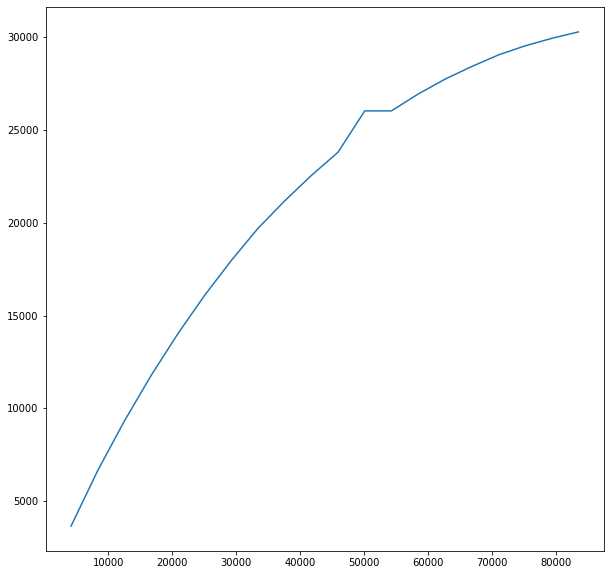

In [10]:
x=list(i[0] for i in mas1)
y=list(i[1] for i in mas1)
plt.figure(figsize=(10,10))
plt.plot(x,y)


plt.show()

In [11]:
mas2=[]
for i in tqdm(range(1,13)):
    mas=[]
    mas1=[]
    a=1+11*(i-1)
    b=1+11*i
    tek_table_train=old_data.iloc[:,a:b]
    target_train=old_data['has_trip_here' + str(i)]
    X_train=tek_table_train.drop(columns=['has_trip_here'+str(i)])
    
    tek_table_test=new_data.iloc[:,a:b]
    target_test=new_data['has_trip_here' + str(i)]
    X_test=tek_table_test.drop(columns=['has_trip_here'+str(i)])
    
    
    tek_clf=XGBClassifier(n_estimators=25,depth=7,min_child_weight=4)
    tek_clf.fit( X_train, target_train)

    y_pred=tek_clf.predict( X_test)
    y_pred_proba=tek_clf.predict_proba( X_test)
    tek_score=roc_auc_score(target_test,y_pred)
    mas=list((x[1],y,z) for x,y,z in zip(y_pred_proba,y_pred,target_test))
    
    mas.sort(reverse=True)
    n_buckets=20
    bucket_size=int(len(mas)/n_buckets)
    
    
    for d in range(1,n_buckets+1):
        a=0
        b=d*bucket_size
        t1=d*bucket_size
        f2=list(i[2] for i in mas[a:b])
        t4=np.array(f2).sum()
        mas1.append(( d*bucket_size,t4))
        
    mas2.append(mas1)
    



100%|██████████| 12/12 [01:09<00:00,  5.81s/it]


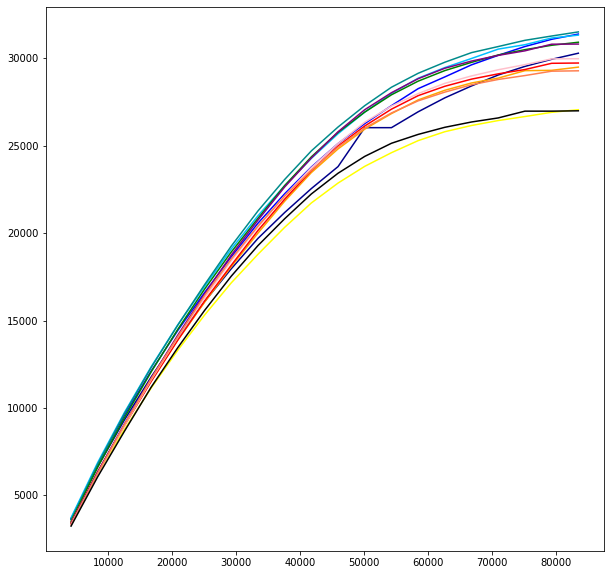

In [12]:
dd=[]
cols=['darkblue','blue','deepskyblue','darkcyan','green','yellow','orange','red','purple','pink','coral','black']

for j in range(1,13):
    x=list(i[0] for i in mas2[j-1])
    y=list(i[1] for i in mas2[j-1])
    dd.append((x,y))


plt.figure(figsize=(10,10))

for j in range(1,13):
    plt.plot(dd[j-1][0],dd[j-1][1],c= cols[j-1])

#plt.xlim(50000)
#plt.ylim(23000)
plt.show()

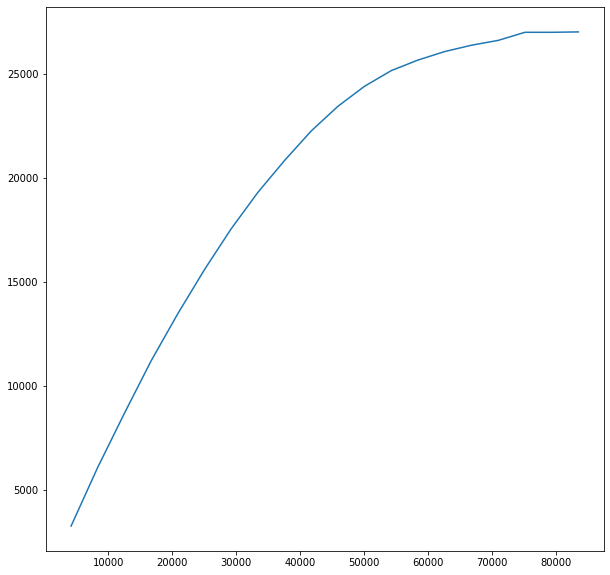

In [13]:
x=list(i[0] for i in mas2[11])
y=list(i[1] for i in mas2[11])
plt.figure(figsize=(10,10))
plt.plot(x,y)


plt.show()

In [16]:
ggg=pd.DataFrame()
for j in range(1,13):    
    stolb0=list(i[0] for i in mas2[j-1])
    stolb1=list(i[1] for i in mas2[j-1])

    table=pd.DataFrame()
    table['sent']= list(stolb0 )
    table['guessed']= list(stolb1 )
    table['spent']= list(i*0.5 for i in stolb0 )
    table['gained']= list(i*3 for i in stolb1 )
    table['pribul']=table['gained']-table['spent']

    ggg[str(j)] = table['pribul']


In [17]:
ggg.head(20)

,1,2,3,4,5,6,7,8,9,10,11,12
0,8847.0,8868.0,9072.0,8724.0,8430.0,8073.0,8250.0,8148.0,8145.0,7911.0,7860.0,7641.0
1,15762.0,16203.0,16482.0,16203.0,15690.0,14526.0,14829.0,14895.0,14859.0,14535.0,14619.0,14037.0
2,21693.0,22491.0,22968.0,22788.0,22071.0,20040.0,20856.0,20721.0,20997.0,20742.0,20892.0,19749.0
3,26958.0,27984.0,28716.0,28599.0,27840.0,25080.0,26256.0,26202.0,26760.0,26472.0,26655.0,25218.0
4,31611.0,32886.0,33843.0,33798.0,33084.0,29496.0,31224.0,31236.0,32079.0,31680.0,31809.0,29931.0
5,35727.0,37269.0,38349.0,38625.0,37863.0,33420.0,35613.0,35832.0,37011.0,36330.0,36762.0,34209.0
6,39276.0,41319.0,42666.0,43161.0,42150.0,36855.0,39639.0,39879.0,41622.0,40656.0,40944.0,38004.0
7,42396.0,45009.0,46284.0,47112.0,45846.0,39672.0,43299.0,43758.0,45531.0,44358.0,44511.0,41166.0
8,44751.0,47967.0,49362.0,50421.0,49368.0,42207.0,46692.0,47043.0,49137.0,47616.0,47568.0,43683.0
9,46776.0,50466.0,51957.0,53244.0,52218.0,44307.0,49518.0,49842.0,52032.0,50361.0,49929.0,45852.0
